# 实战 Kaggle 比赛：预测房价

参加比赛的地址: https://www.kaggle.com/c/california-house-prices

In [1]:
# 手工下载数据
# https://www.kaggle.com/c/california-house-prices/data?select=test.csv
# 放在../data/kaggle01_house_train.csv
# 放在../data/kaggle01_house_test.csv

pandas 加载数据

In [1]:
import pandas as pd

In [2]:
DATA_DIR = '../data/'
train_data = pd.read_csv(DATA_DIR+'kaggle01_house_train.csv',header=0)
test_data = pd.read_csv(DATA_DIR+'kaggle01_house_test.csv',header=0)
train_data.shape, test_data.shape

((47439, 41), (31626, 40))

In [3]:
train_data.head(3)

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA


## 查看数据概览

In [4]:
import toad

In [5]:
# 唯一性检查
print(train_data.shape)
print('uid唯一:',train_data['Id'].nunique())

(47439, 41)
uid唯一: 47439


In [6]:
# 数据概览表生成
det_df=toad.detect(train_data)
display(det_df.sort_values(by='type').head(3))

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
Id,int64,47439,0.00%,47439,23719.0,13694.604047,0.0,474.38,4743.8,23719.0,35578.5,42694.2,46963.62,47438.0
Zip,int64,47439,0.00%,1245,93279.178587,2263.459104,85611.0,90001.0,90034.0,94114.0,95073.0,95236.0,96067.0,96155.0
High School Score,float64,47439,11.00%,10,6.134344,1.984711,1.0,2.0,3.0,6.0,8.0,8.0,10.0,10.0


In [7]:
# 第一次选择字段（手工选择）
id_col=['Id']
x_num_col=['Year built', 'Lot', 'Bathrooms', 'Full bathrooms',
'Total interior livable area', 'Total spaces', 'Garage spaces',
'Elementary School Score', 'Elementary School Distance',
'Middle School Score', 'Middle School Distance', 'High School Score',
'High School Distance', 'Tax assessed value', 'Annual tax amount',
'Listed Price', 'Last Sold Price']
x_obj_col=['Zip']
y_nam='Sold Price'

In [8]:
id_col+x_num_col+x_obj_col

['Id',
 'Year built',
 'Lot',
 'Bathrooms',
 'Full bathrooms',
 'Total interior livable area',
 'Total spaces',
 'Garage spaces',
 'Elementary School Score',
 'Elementary School Distance',
 'Middle School Score',
 'Middle School Distance',
 'High School Score',
 'High School Distance',
 'Tax assessed value',
 'Annual tax amount',
 'Listed Price',
 'Last Sold Price',
 'Zip']

## 特征处理

In [9]:
fet_col=x_num_col+x_obj_col
all_features = pd.concat((train_data[fet_col], test_data[fet_col]))
print(all_features.shape)
all_features.head(3)

(79065, 18)


,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
0,1969.0,1.0,0.0,NaN,1.0,0.0,0.0,7.0,0.4,NaN,NaN,8.0,1.3,886486.0,12580.0,4198000.0,NaN,94022
1,1926.0,4047.0,2.0,2.0,872.0,1.0,1.0,3.0,0.8,2.0,1.1,2.0,1.3,505000.0,6253.0,525000.0,328000.0,90047
2,1958.0,9147.0,3.0,1.0,1152.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.1,49627.0,468.0,180000.0,NaN,95375


In [10]:
numeric_features = x_num_col
print('numeric:',len(numeric_features))
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
all_features[numeric_features] = all_features[numeric_features].fillna(0)
print(all_features.shape)
all_features.head(3)

numeric: 17
(79065, 18)


,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
0,0.048505,-0.018489,-2.058002,0.000000,-0.006552,-0.135519,-0.123623,0.622758,-0.339282,0.000000,0.000000,0.929329,-0.318177,0.194780,0.305277,1.407144,0.000000,94022
1,-0.284656,-0.018287,-0.336769,-0.106424,-0.005198,-0.062731,-0.050507,-1.308481,-0.156142,-1.607235,-0.263072,-2.101186,-0.318177,-0.175090,-0.188125,-0.282410,-0.365086,90047
2,-0.036722,-0.018031,0.523848,-1.167570,-0.004763,-0.135519,-0.123623,0.000000,0.000000,0.000000,0.000000,0.000000,2.350838,-0.616598,-0.639260,-0.441107,0.000000,95375


In [11]:
all_features['Zip']=all_features['Zip'].apply(lambda x: str(x)[0:3])
all_features.dtypes
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)
all_features.head(3)

(79065, 76)


,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,...,Zip_953,Zip_954,Zip_955,Zip_956,Zip_957,Zip_958,Zip_959,Zip_960,Zip_961,Zip_nan
0,0.048505,-0.018489,-2.058002,0.000000,-0.006552,-0.135519,-0.123623,0.622758,-0.339282,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,-0.284656,-0.018287,-0.336769,-0.106424,-0.005198,-0.062731,-0.050507,-1.308481,-0.156142,-1.607235,...,0,0,0,0,0,0,0,0,0,0
2,-0.036722,-0.018031,0.523848,-1.167570,-0.004763,-0.135519,-0.123623,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0


## 构建数据集

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [13]:
# 构建训练和测试集合
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values,
                              dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values,
                             dtype=torch.float32)
train_labels = torch.tensor(train_data[y_nam].values.reshape(-1, 1),
                            dtype=torch.float32)
train_features.shape,test_features.shape,train_labels.shape

(torch.Size([47439, 76]), torch.Size([31626, 76]), torch.Size([47439, 1]))

## 训练模型

深度学习模型调整

In [66]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    # 普通类型
    net = nn.Sequential(nn.Linear(in_features, 1))
    return net
# def get_net():
#     # 添加1-2层隐藏层
#     net = nn.Sequential(nn.Linear(in_features, 152), nn.ReLU(),
#                         nn.Linear(152, 1))
#     return net
# def get_net():
#     # 添加1层隐藏层+dropout
#     dropout1=0.1
#     net = nn.Sequential(nn.Linear(in_features, 152), nn.ReLU(),
#                         nn.Dropout(dropout1), 
#                         nn.Linear(152, 1))
#     return net

我们更关心相对误差$\frac{y - \hat{y}}{y}$，
解决这个问题的一种方法是用价格预测的对数来衡量差异

In [15]:
def log_rmse(net, features, labels):
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds), torch.log(labels)))
    return rmse.item()

我们的训练函数将借助Adam优化器

In [16]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate,
                                 weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

K折交叉验证

In [17]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

返回训练和验证误差的平均值

In [18]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k, net

调整神经网络

In [67]:
def get_net():
    # 添加1-2层隐藏层
    net = nn.Sequential(nn.Linear(in_features, 152), nn.ReLU(),
                        nn.Linear(152, 1))
    return net

fold 1, train log rmse 0.433247, valid log rmse 0.445420
fold 2, train log rmse 0.427390, valid log rmse 0.426226
fold 3, train log rmse 0.429571, valid log rmse 0.414794
fold 4, train log rmse 0.299687, valid log rmse 0.321313
fold 5, train log rmse 0.408051, valid log rmse 0.436533
5-折验证: 平均训练log rmse: 0.399589, 平均验证log rmse: 0.408857


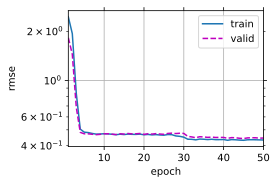

In [63]:
k, num_epochs, lr, weight_decay, batch_size = 5, 50, 0.1, 0, 128
train_l, valid_l, net = k_fold(k, train_features, train_labels, num_epochs, lr,
                               weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

## 提交你的Kaggle预测

In [64]:
def only_pred(net, test_feature, test_data):
    preds = net(test_features).detach().numpy()
    test_data[y_nam] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data[y_nam]], axis=1)
    submission.to_csv('submission.csv', index=False)

only_pred(net, test_features, test_data)

train log rmse 0.417713


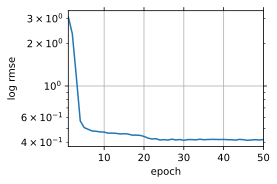

In [65]:
# def train_and_pred(train_features, test_feature, train_labels, test_data,
#                    num_epochs, lr, weight_decay, batch_size):
#     net = get_net()
#     train_ls, _ = train(net, train_features, train_labels, None, None,
#                         num_epochs, lr, weight_decay, batch_size)
#     d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
#              ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
#     print(f'train log rmse {float(train_ls[-1]):f}')
#     preds = net(test_features).detach().numpy()
#     test_data[y_nam] = pd.Series(preds.reshape(1, -1)[0])
#     submission = pd.concat([test_data['Id'], test_data[y_nam]], axis=1)
#     submission.to_csv('submission.csv', index=False)

# train_and_pred(train_features, test_features, train_labels, test_data,
#                num_epochs, lr, weight_decay, batch_size)